# 2021-12_PKU_TCA_standardcurve

Meausred OD290, which is linearly correlated with concentration of TCA.
This will serve as a standard curve for all Phe->TCA conversion experiments.

All replicates were performed on the same day since there is no biological component that requires them to be done on multiple days. Each replicate is composed of 4 technical replicates.

In [1]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

# Set the default sans-serif font to Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Set to always use sans-serif fonts
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D
from scipy.stats import linregress

## Data Import

In [3]:
# Renaming the file as "file"
file = '/Users/atriassi/Dropbox (Personal)/Education/Grad School/*Papers/Data_fromSynlogic/12-3-2021  Triassi-Voigt-Synlogic Paper - Data for Figure 3.xlsx'
sheets = ['TCA-OD290 Standard Curve-tidy']

# Getting data as dataframe
xl = pd.read_excel(file, sheet_name = sheets, header = 0, fill_value = 0)


In [4]:
xl['TCA-OD290 Standard Curve-tidy']

,replicate,OD290,TCA_conc
0,1,0.0000,0.000000
1,1,0.0605,0.009766
2,1,0.0795,0.019531
3,1,0.1155,0.039062
4,1,0.1955,0.078125
5,1,0.3385,0.156250
6,1,0.6045,0.312500
7,1,1.2455,0.625000
8,2,0.0000,0.000000
9,2,0.0135,0.009766


In [5]:
file = xl['TCA-OD290 Standard Curve-tidy']

tca_conc = sorted(file['TCA_conc'].unique())
replicate = sorted(file['replicate'].unique())

print(tca_conc,replicate)

[0.0, 0.009765625, 0.01953125, 0.0390625, 0.078125, 0.15625, 0.3125, 0.625] [1, 2, 3, 4]


In [6]:
grouped_df = file.groupby(['TCA_conc'], as_index=False).agg([np.mean, np.std])


grouped_df = grouped_df['OD290']
grouped_df = grouped_df.reset_index()

grouped_df

,TCA_conc,mean,std
0,0.000000,0.00000,0.000000
1,0.009766,0.02650,0.022876
2,0.019531,0.05500,0.016583
3,0.039062,0.11850,0.010893
4,0.078125,0.21825,0.025158
5,0.156250,0.39675,0.039567
6,0.312500,0.69475,0.067292
7,0.625000,1.31525,0.060555


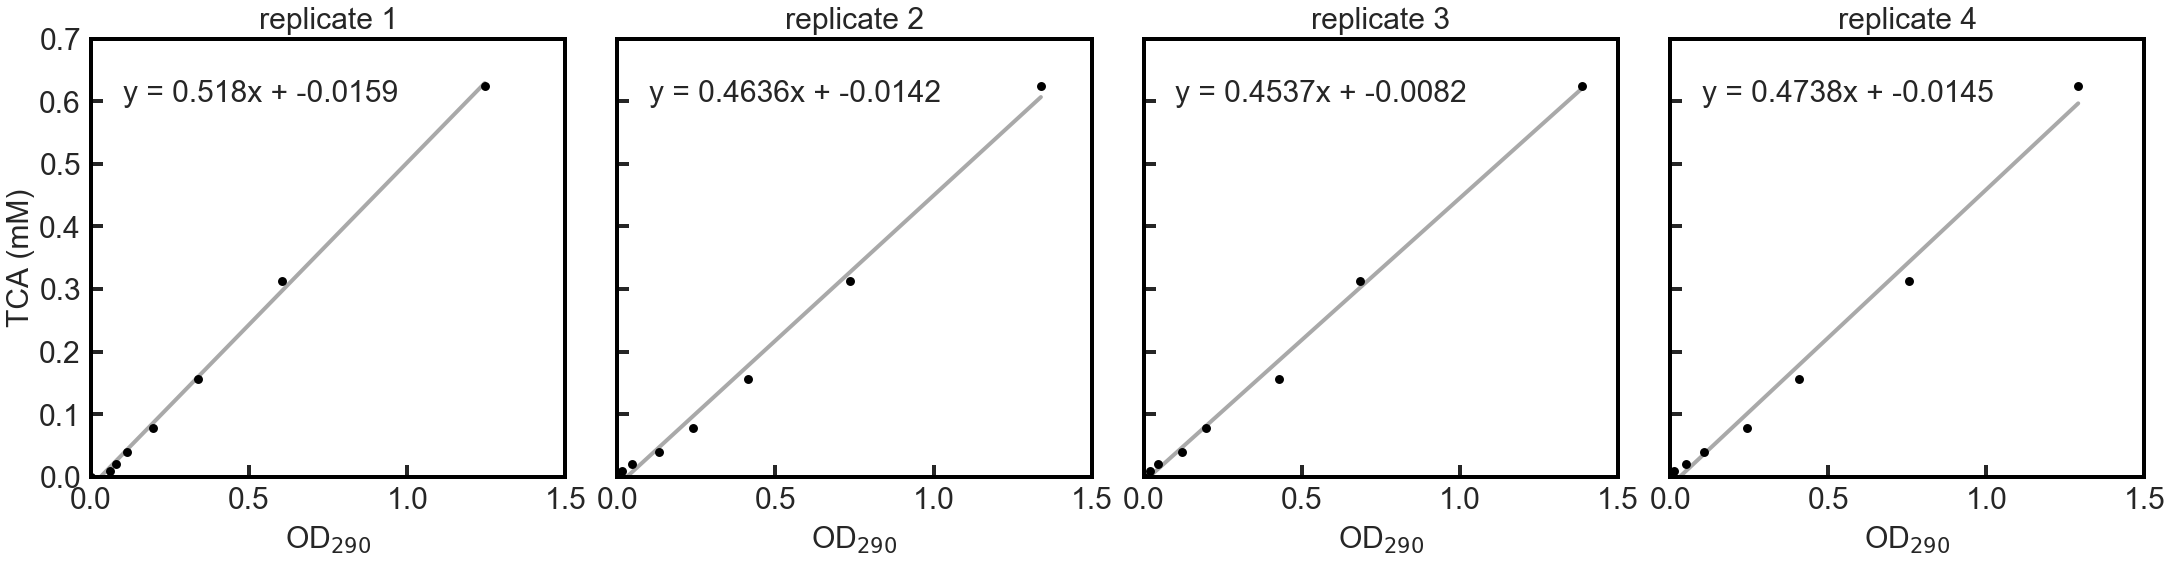

In [7]:
rows = 1
cols = 4

fig, ax = plt.subplots(rows,cols, figsize=(7.5*cols, 7.5*rows), sharey = 'row',sharex = 'col')
plt.tight_layout(pad = 4, h_pad = 6, w_pad = 4) #tidies up spacing between plots

results = dict()

for r in replicate:

    FP = ax[replicate.index(r)]
    
    # make plot borders black and specified thickness
    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(4)
    
    # calculate slope of best-fit line through the points
    data_to_fit = file[file['replicate']==r]
    results[r] = linregress(data_to_fit['OD290'],data_to_fit['TCA_conc'])
    
    # plot data
    FP.scatter(data_to_fit['OD290'],data_to_fit['TCA_conc'], color= 'black',
              linewidth = 0, marker = 'o', s =80, zorder = 1)
    
    # plot best-fit line
    y_fit = results[r].intercept + results[r].slope*data_to_fit['OD290']
    FP.plot(data_to_fit['OD290'], y_fit, color = 'darkgrey', zorder=0, linewidth = 4)
    
    FP.grid(False)
    FP.set_title('replicate {}'.format(r), size = 30, pad = 10)
                    
    FP.set_xlabel('OD$_\mathrm{290}$', size = 30, labelpad = 10)
    
    if replicate.index(r) == 0:
        FP.set_ylabel('TCA (mM)', size = 30)

    FP.set_xlim(0,1.5)
    FP.set_ylim(0,0.7)

    FP.tick_params(labelsize = 30, length = 12, width = 4, direction = 'in', pad = 10)
    
    equation = 'y = {}x + {}'.format(round(results[r].slope,4), round(results[r].intercept,4))
    
    FP.text(0.1,0.6, equation, size = 30)
    

In [8]:
# fig.savefig('TCA_standardcurve_eachreplicate.pdf', bbox_inches = "tight", transparent = True)

Text(0.1, 0.525, 'R$^2$ = 0.99682')

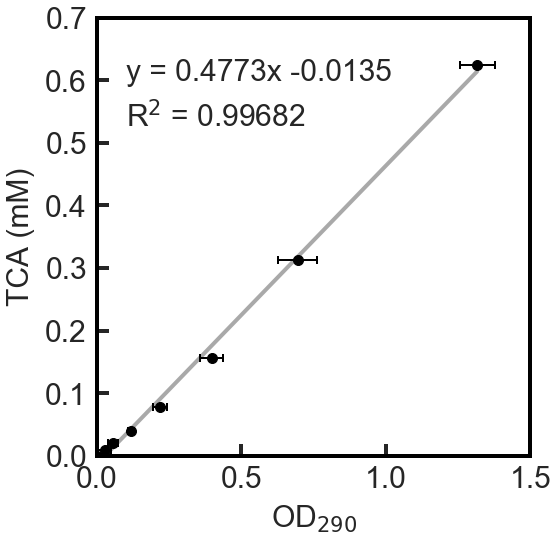

In [9]:
rows = 1
cols = 1

fig2, ax2 = plt.subplots(rows,cols, figsize=(7.5*cols, 7.5*rows), sharey = 'row',sharex = 'col')
plt.tight_layout(pad = 4, h_pad = 6, w_pad = 4) #tidies up spacing between plots


FP = ax2

# make plot borders black and specified thickness
for spine in FP.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(4)

# calculate slope of best-fit line through the points

plot_data = grouped_df
results = linregress(plot_data['mean'],plot_data['TCA_conc'])

# plot data
FP.errorbar(plot_data['mean'],plot_data['TCA_conc'], xerr = plot_data['std'], color= 'black',
          linewidth = 0, marker = 'o', markersize = 10, 
            elinewidth = 2, capsize = 4, capthick = 2, zorder = 1)

# plot best-fit line
y_fit = results.intercept + results.slope*plot_data['mean']
FP.plot(plot_data['mean'], y_fit, color = 'darkgrey', zorder=0, linewidth = 4)

FP.grid(False)
# FP.set_title('replicate {}'.format(r), size = 30, pad = 10)

FP.set_xlabel('OD$_\mathrm{290}$', size = 30, labelpad = 10)

FP.set_ylabel('TCA (mM)', size = 30, labelpad = 10)

FP.set_xlim(0,1.5)
FP.set_ylim(0,0.7)

FP.tick_params(labelsize = 30, length = 12, width = 4, direction = 'in', pad = 10)

equation = 'y = {}x {}'.format(round(results.slope,4), round(results.intercept,4))

FP.text(0.1,0.6, equation, size = 30)
FP.text(0.1,0.525, 'R$^2$ = {}'.format(round(results.rvalue**2,5)),size = 30)


In [10]:
# fig2.savefig('TCA_standardcurve_ErrorBars.pdf', bbox_inches = "tight", transparent = True)


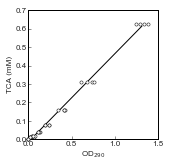

In [25]:
rows = 1
cols = 1

fig2, ax2 = plt.subplots(rows,cols, figsize=(2.2*cols, 2.1*rows), sharey = 'row',sharex = 'col')
plt.tight_layout(pad = 0) #tidies up spacing between plots


FP = ax2

# make plot borders black and specified thickness
for spine in FP.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

# calculate slope of best-fit line through the points
plot_data = grouped_df
results = linregress(plot_data['mean'],plot_data['TCA_conc'])

# plot data
# FP.errorbar(plot_data['mean'],plot_data['TCA_conc'], xerr = plot_data['std'], color= 'black',
#           linewidth = 0, marker = 'o', markersize = 10, 
#             elinewidth = 2, capsize = 4, capthick = 2, zorder = 1)

for r in replicate:
    data_to_fit = file[file['replicate']==r]
    
    FP.scatter(data_to_fit['OD290'],data_to_fit['TCA_conc'], color= 'white',
                  linewidth = 0.5, marker = 'o', s =10, zorder = 11, edgecolor='black', clip_on=False)

# plot best-fit line
y_fit = results.intercept + results.slope*plot_data['mean']
FP.plot(plot_data['mean'], y_fit, color = 'black', zorder=0, linewidth = 1)

FP.grid(False)
# FP.set_title('replicate {}'.format(r), size = 30, pad = 10)

FP.set_xlabel('OD$_\mathrm{290}$', size = 8, labelpad = 2)

FP.set_ylabel('TCA (mM)', size = 8, labelpad = 2)

FP.set_xlim(0,1.5)
FP.set_ylim(0,0.7)

FP.set_xticks([0,0.5,1,1.5])
FP.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)

equation = 'y = {}x {}'.format(round(results.slope,4), round(results.intercept,4))

# FP.text(0.1,0.6, equation, size = 8)
# FP.text(0.1,0.525, 'R$^2$ = {}'.format(round(results.rvalue**2,5)),size = 8)


In [23]:
print(equation, '\n', 'R$^2$ = {}'.format(round(results.rvalue**2,5)))

y = 0.4773x -0.0135 
 R$^2$ = 0.99682


In [26]:
# fig2.savefig('FigS12_TCA_standardcurve_AllPoints.pdf', bbox_inches = "tight", transparent = True)


In [13]:
data_allreps['means']

NameError: name 'data_allreps' is not defined